# make_mockobs_galaxycutout

run the noiseadding script on cutouts around a galaxy - looking at the CGM in the EAGLE simulation rather than the IGM.

In [1]:
%run 'make_mockobs.ipynb'

In [2]:
machine='chinook'

In [3]:
resolution = None;  # This should prompt the script to just use the lowest resolution 

slicewidth = 20; 
exptime = 1000.*60.*60.; 
CMOS = True; ROnoise= None; 
x_center = 50.5; y_center = 13.5

In [ ]:
# load the data

# cut out the 

****** Working on mock observation for distance 100Mpc ******
loading the data...
Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 100Mpc is 6.40094057981.
Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/data_100Mpc_6arcsec_20slwd.npz exists, loading now...
./intermediatedata/data_100Mpc_6arcsec_20slwd.npz was not saved as a tuple since too large, returning as tuple with 32000,1,6.40094057981 appended.
DEBUG: the resolution outputted from load_data is 6.40094057981
extracting the FOV...
making a mask for the data


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The current mask is [[-0.5609471201896667 -0.5673826336860657 -0.5707893371582031 ...,
  -1.6017686128616333 -1.5907478332519531 -1.580721139907837]
 [-0.5927731990814209 -0.6027000546455383 -0.6099472641944885 ...,
  -1.6161918640136719 -1.6040723323822021 -1.5926581621170044]
 [-0.6216232180595398 -0.6346660852432251 -0.6453272104263306 ...,
  -1.6309171915054321 -1.61774742603302 -1.6050255298614502]
 ..., 
 [-1.5873242616653442 -1.5931445360183716 -1.5988320112228394 ...,
  -2.086695671081543 -2.0889346599578857 -2.090973138809204]
 [-1.5847303867340088 -1.5903996229171753 -1.595850944519043 ...,
  -2.0886385440826416 -2.0909883975982666 -2.0931239128112793]
 [-1.5825705528259277 -1.5880998373031616 -1.593294382095337 ...,
  -2.0907442569732666 -2.093170166015625 -2.0953640937805176]]
adding noise to the data...
******* Adding noise to the input data to simulate a mock observation by the 48.0 lens Dragonfly Telescope *******
DEBUGGING: the binpix_size (resolution) is 6.40094057981


Saving readout noise array as noisy_fov_1000.0hr_newcam_100Mpcdist_6.4arcsec_20slwd_xycenter_50.5_13.5_RARRAY.npz
Saving the sky background array as noisy_fov_1000.0hr_newcam_100Mpcdist_6.4arcsec_20slwd_xycenter_50.5_13.5_BSKYARRAY.npz
Saving the sky background array as noisy_fov_1000.0hr_newcam_100Mpcdist_6.4arcsec_20slwd_xycenter_50.5_13.5_DARRAY.npz
Saving the mask as noisy_fov_1000.0hr_newcam_100Mpcdist_6.4arcsec_20slwd_xycenter_50.5_13.5_MASK.npz
****** Done mock observation for distance 100Mpc ******



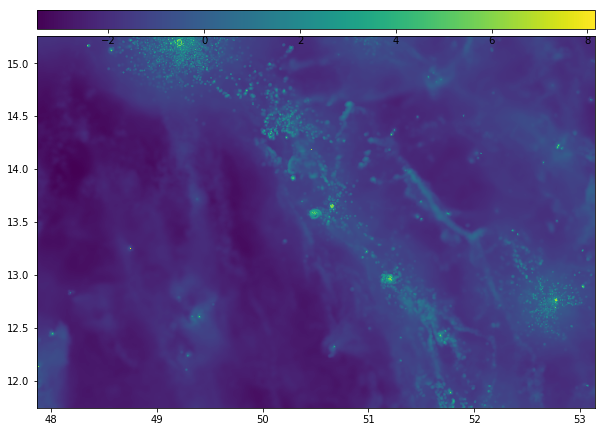

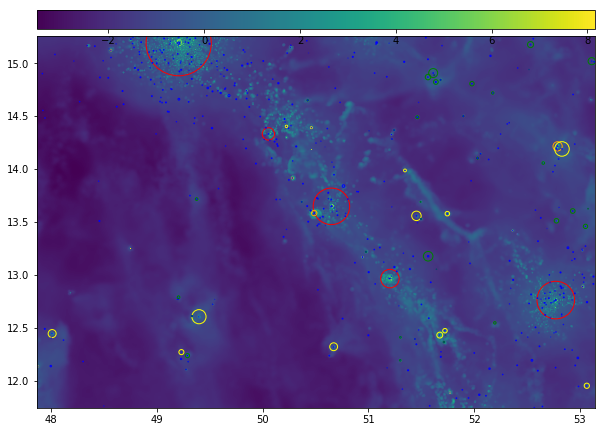

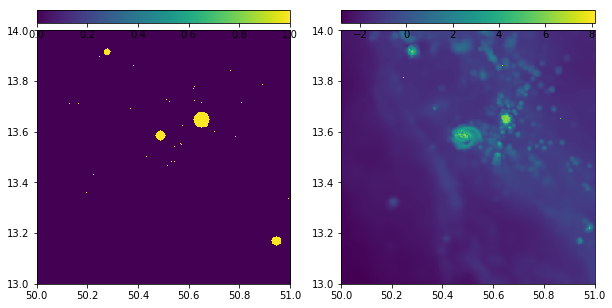

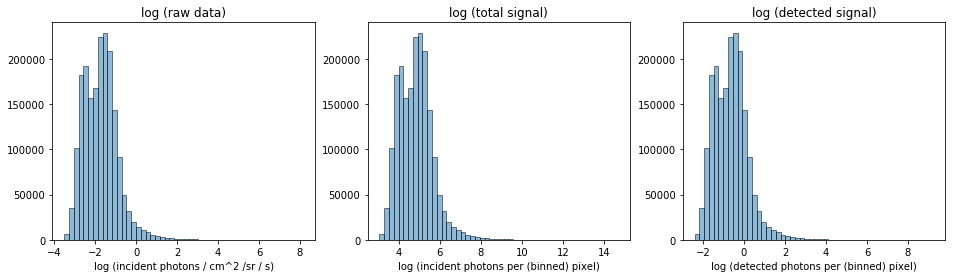

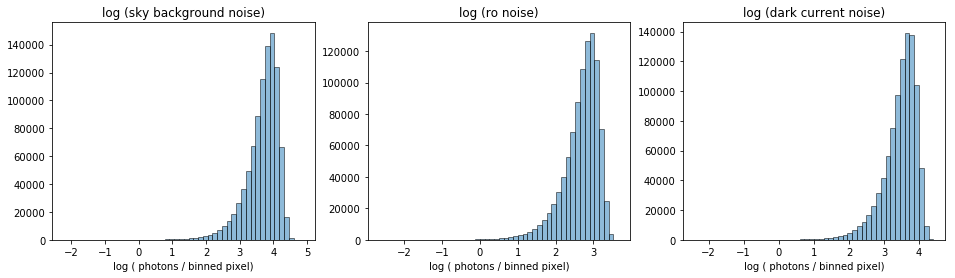

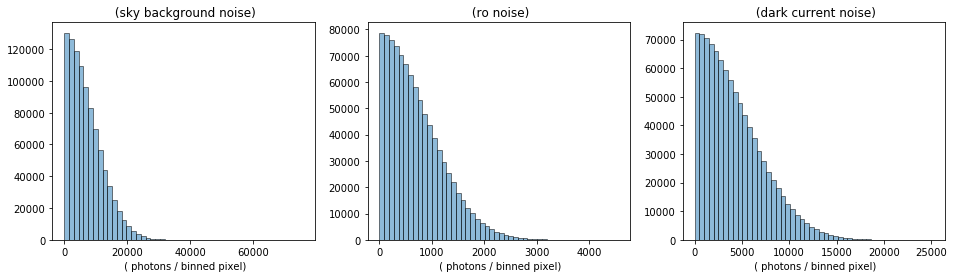

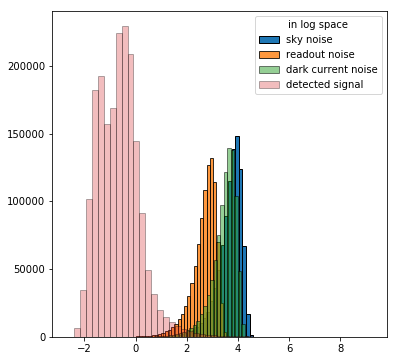

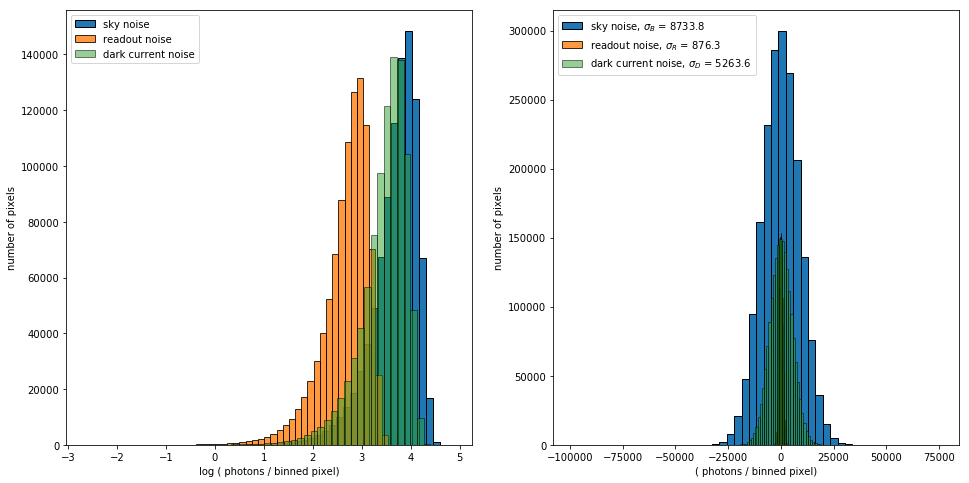

In [4]:
# cut out the FOV and add noise to it
distance = '100Mpc'
data_FOV_100, xystarts_100, size_100, noiseadded_signal_100, B_sky_array_100, R_array_100,D_array100, mask_100 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,x_center=x_center,y_center=y_center,includemeannoise=True,mask=True,debug=True,plotchecks=True)

In [5]:
print data_FOV_100.shape, B_sky_array_100.shape, R_array_100.shape, D_array100.shape


(1688, 1124) (1688, 1124) (1688, 1124) (1688, 1124)


In [6]:
# masked simulation
mx_simulation = np.ma.masked_array(data_FOV_100, mask=mask_100)
# masked mock observation
mx_noisy = np.ma.masked_array(noiseadded_signal_100, mask=mask_100)

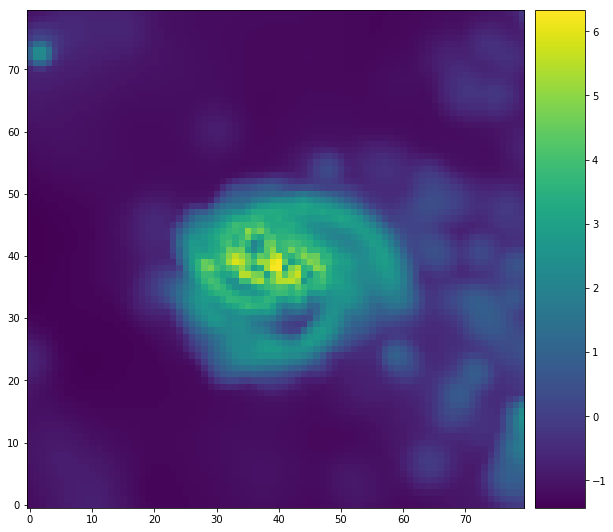

In [10]:
# cut out the section around the galaxy
rawsim_cutout = data_FOV_100[800:880,550:630]
rawsimmasked = np.ma.masked_array(data_FOV_100, mask=mask_100)
rawsimmasked_cutout = rawsimmasked[800:880,550:630]

noise_cutout = noiseadded_signal_100[800:880,550:630]
mx_noisy = np.ma.masked_array(noiseadded_signal_100, mask=mask_100)
noisemasked_cutout = mx_noisy[800:880,550:630]

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(rawsim_cutout.T,ax=ax1,colorbar=True)#,bounds=bounds)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10


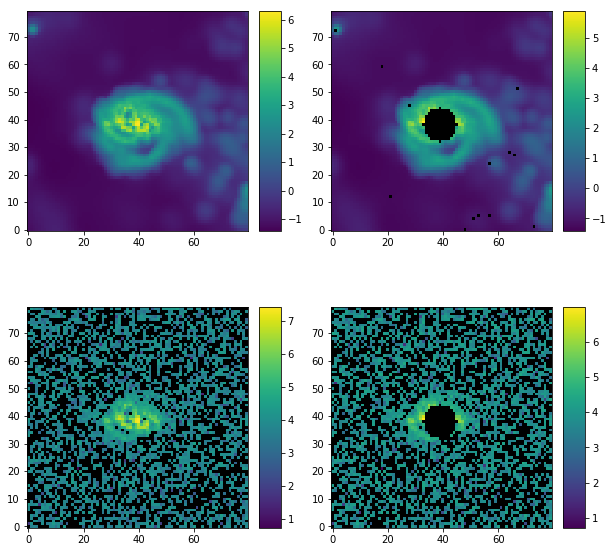

In [13]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(10, 10))
plotdata(rawsim_cutout.T,ax=ax1,colorbar=True)#,bounds=bounds)
plotdata(rawsimmasked_cutout.T,ax=ax2,colorbar=True)#,bounds=bounds)
plotdata(np.log10(noise_cutout-768000.0-27648000.0-76310797.0337).T,ax=ax3,colorbar=True)#,bounds=bounds)
plotdata(np.log10(noisemasked_cutout-768000.0-27648000.0-76310797.0337).T,ax=ax4,colorbar=True)#,bounds=bounds)
